In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime #for handling dates
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress
import gmaps
from pprint import pprint
#need gkey as 'gkey2' 
gkey2=""

In [3]:
MergedDF=pd.read_csv('MergedDF.csv')
MergedDF

,Unnamed: 0,RegionID_zhviAll,RegionName,City_zhviAll,State_zhviAll,Metro_zhviAll,CountyName_zhviAll,SizeRank_zhviAll,1996-04_zhviAll,1996-05_zhviAll,...,2018-09_Mediansqftrent,2018-10_Mediansqftrent,2018-11_Mediansqftrent,2018-12_Mediansqftrent,2019-01_Mediansqftrent,2019-02_Mediansqftrent,2019-03_Mediansqftrent,2019-04_Mediansqftrent,2019-05_Mediansqftrent,2019-06_Mediansqftrent
0,0,69816.0,28269,Charlotte,NC,Charlotte-Concord-Gastonia,Mecklenburg County,32.0,130694.0,131261.0,...,0.758,0.758,0.764,0.770,0.776,0.780,0.782,0.782,0.786,0.792
1,1,69823.0,28277,Charlotte,NC,Charlotte-Concord-Gastonia,Mecklenburg County,55.0,192153.0,192630.0,...,0.826,0.828,0.828,0.830,0.830,0.830,0.832,0.836,0.842,0.852
2,2,69672.0,28027,Concord,NC,Charlotte-Concord-Gastonia,Cabarrus County,85.0,140395.0,141002.0,...,0.766,0.768,0.776,0.786,0.796,0.800,0.802,0.806,0.812,0.822
3,3,69431.0,27587,Wake Forest,NC,Raleigh,Wake County,138.0,206263.0,206913.0,...,0.768,0.770,0.770,0.770,0.768,0.770,0.770,0.772,0.772,0.776
4,4,69699.0,28078,Huntersville,NC,Charlotte-Concord-Gastonia,Mecklenburg County,183.0,176002.0,176147.0,...,0.758,0.758,0.762,0.768,0.770,0.772,0.772,0.774,0.778,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,790,69643.0,27972,Salvo,NC,Kill Devil Hills,Dare County,30205.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,791,69651.0,27982,Rodanthe,NC,Kill Devil Hills,Dare County,30316.0,218257.0,212818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,792,69492.0,27708,Durham,NC,Durham-Chapel Hill,Durham County,30392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,793,NaN,27960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
MergedDF2=pd.read_csv('BreweryDataCleanedv2.csv')

In [5]:
sorted_df = MergedDF2.sort_values(by='OpenYear')
sorted_df

,Unnamed: 0,index,Trade Name,Zip,OpenYear,OpenMonth
317,317,1629,Carolina Brewing Company,27540,1995,6
318,318,1632,Top of the Hill Restaurant and Brewery,27514,1996,9
3,3,70,Rock Bottom Restaurant and Brewery,28202,1998,3
4,4,72,Olde Hickory Brewery,28602,1998,4
5,5,73,Olde Hickory Brewery,28602,2000,4
...,...,...,...,...,...,...
289,289,1524,Guidon Brewing Company,28792,2019,6
171,171,1078,Southern Range Brewing,28110,2019,11
273,273,1471,Skytown,28405,2019,6
86,86,618,Broomtail Craft Brewery,28405,2020,1


In [6]:
BreweryDF=pd.read_csv('Brewery_DistilleryData.csv')
BreweryDF

,#,File Number,Trade Name,Corp Name,Business Status,Address,City,State,Zip,Mail Address,Mail City,Mail State,Mail Zip,County,Permit Number,Issue Date,Permit Status
0,1.0,-,Ivory Tower Brewery,Appalachian State University,Withdrawn,775 Bodenheimer Drive,Boone,NaN,28608,PO Box 32066,Boone,NC,28608,Watauga,NaN,NaN,NaN
1,2.0,-,Trophy Brewing,Grain Raleigh LLC,Withdrawn,827 West Morgan Street,Raleigh,NaN,27603,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
2,3.0,-,Hosanna Brewing Company,Hosanna Brewing Company,Withdrawn,2912 North Main Street Unit 100,Fuquay Varina,NaN,27526,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
3,4.0,-,Tryon Back Door Distillery,Tryon Back Door Distillery LLC,Withdrawn,77 Maple Street,Tryon,NaN,28782,318 Springbrook Drive,Columbus,NC,28722,Polk,NaN,NaN,NaN
4,5.0,-,Blackjack Brewing Company,Blackjack Brewing Company LLC,Withdrawn,1053 East Whitaker Mill Suite 101,Raleigh,NaN,27604,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,608.0,0554CM-999,Hops Restaurant Bar and Brewery,Hops of Matthews Limited,Cancelled,9950 East Independence Blvd,Matthews,NaN,28105,150 Hancock Street,Madison,GA,30650,Mecklenburg,0554BM,5/16/1997,Cancelled
1634,609.0,0556CM-999,Laughing Seed Cafe,Laughing Seed Inc,Cancelled,40 Wall Street,Asheville,NaN,28801,NaN,NaN,NaN,NaN,Buncombe,0556BM,7/28/1997,Cancelled
1635,NaN,0556CM-999,Laughing Seed Cafe,Laughing Seed Inc,Cancelled,40 Wall Street,Asheville,NaN,28801,NaN,NaN,NaN,NaN,Buncombe,0556BW,12/8/1997,Cancelled
1636,610.0,0557CM-998,Main Street Beer Company,Williamsville Brewery Limited,Cancelled,804 West Pine Street,Farmville,NaN,27828,1911 West Main Street,Richmond,VA,23220,Pitt,00102626BW,3/7/2001,Cancelled


In [7]:
#Create a DF for breweries that have correct permit and issue dates
BrewDF_inputs=BreweryDF.loc[:,['Trade Name','Issue Date','Zip']] #pair down to only these columns
BrewDF_inputs.dropna(subset=['Issue Date','Zip'],inplace=True) #Drop rows with 'NaN' value for 'Issue Date' or 'Zip'
BrewDF_inputs.drop_duplicates(subset='Trade Name',keep='first',inplace=True) #keep only earliest instance of each Brewery
BrewDF_inputs.rename(columns={'Trade Name':'Brewery', 'Issue Date':'Open Date'},inplace=True)
BrewDF_inputs.reset_index(drop=True,inplace=True) #reset the index to use for looping later
BrewDF_inputs


,Brewery,Open Date,Zip
0,Two Moons Brew N View,1/26/1998,28804
1,Catawba Valley Brewing Company,7/17/1998,28628
2,Hops Restaurant Bar and Brewery,8/20/1998,28078
3,Rock Bottom Restaurant and Brewery,3/23/1998,28202
4,Olde Hickory Brewery,4/15/1998,28602
...,...,...,...
470,Highland Brewing Company,9/28/1994,28801
471,Carolina Brewing Company,6/2/1995,27540
472,Top of the Hill Restaurant and Brewery,9/18/1996,27514
473,Laughing Seed Cafe,7/28/1997,28801


In [8]:

zhviAll1=[]
zhviAll3=[]
zhviAll5=[]
zhviNC1=[]
zhviNC3=[]
zhviNC5=[]


listnames=['zhviAll1',
           'zhviAll3',
           'zhviAll5',    
           'zhviNC1',
           'zhviNC3',
           'zhviNC5']

lists=[zhviAll1,
       zhviAll3,
       zhviAll5,
       zhviNC1,
       zhviNC3,
       zhviNC5]

#the print commands are inserted to show where the loop has an error by seeing the last line printed before giving the error print
#these will be removed when finalized
print('start')
for l in range(len(lists)):
    for i in range(len(BrewDF_inputs)):
        try:    
            print('date') #these are for debugging to see where the loop went wrong
            dt=datetime.strptime(BrewDF_inputs.loc[i,'Open Date'],'%m/%d/%Y')
            print(f'dt successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year=dt.year
            print(f'year successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year1=year+1
            print(f'year+1 successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year3=year+3
            year5=year+5
            if dt.month<10: #need to add a leading zero to match the formatting of the DF column
                print(f'month<10 l{l},i{i}') #these are for debugging to see where the loop went wrong
                month='0'+str(dt.month)
            else:
                print(f'month>=10 l{l},i{i}') #these are for debugging to see where the loop went wrong
                month=dt.month
            print(l,i,year, year1,year3,year5, month) #these are for debugging to see where the loop went wrong
            
            if l<=2:
                y=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year}-{month}_zhviAll'])
                print(l,i,y) #these are for debugging to see where the loop went wrong
            if l>=3:
                y=float(MergedDF[f'{year}-{month}_zhviAll'].mean())
            if l==0: #use one year in the future for the first 4 loops (0,1,2,3)
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year1}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==1: #second 'l' loop needs to use year3
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year3}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong     
            if l==2: #need to change from using one year out to five years out for loop 'l' 2
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year5}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==3: 
                y1=float(MergedDF[f'{year1}-{month}_zhviAll'].mean())
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==4: 
                y1=float(MergedDF[f'{year3}-{month}_zhviAll'].mean())
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==5: 
                y1=float(MergedDF[f'{year5}-{month}_zhviAll'].mean())
            D1=(y1/y)-1
            print(f'---{D1}---l{l},i{i}') #these are for debugging to see where the loop went wrong
            lists[l].append(D1) #append to list
        except:
            print(f'Error loop l{l}, i{i}') #these are for debugging to see where the loop went wrong
            lists[l].append(np.nan) #Error Message entered into DF when data is not available
    
    BrewDF_inputs[listnames[l]]=lists[l]

start
date
dt successful l0,i0
year successful l0,i0
year+1 successful l0,i0
month<10 l0,i0
0 0 1998 1999 2001 2003 01
0 0 152925.0
0 0 152925.0 160242.0 zhviAll1
---0.047846983815595934---l0,i0
date
dt successful l0,i1
year successful l0,i1
year+1 successful l0,i1
month<10 l0,i1
0 1 1998 1999 2001 2003 07
Error loop l0, i1
date
dt successful l0,i2
year successful l0,i2
year+1 successful l0,i2
month<10 l0,i2
0 2 1998 1999 2001 2003 08
0 2 192016.0
0 2 192016.0 197231.0 zhviAll1
---0.027159195067077757---l0,i2
date
dt successful l0,i3
year successful l0,i3
year+1 successful l0,i3
month<10 l0,i3
0 3 1998 1999 2001 2003 03
0 3 144531.0
0 3 144531.0 158152.0 zhviAll1
---0.09424275760909429---l0,i3
date
dt successful l0,i4
year successful l0,i4
year+1 successful l0,i4
month<10 l0,i4
0 4 1998 1999 2001 2003 04
0 4 93410.0
0 4 93410.0 98745.0 zhviAll1
---0.057113799379081565---l0,i4
date
dt successful l0,i5
year successful l0,i5
year+1 successful l0,i5
month<10 l0,i5
0 5 1999 2000 2002 2004 0

0 67 43776.0
0 67 43776.0 42852.0 zhviAll1
----0.021107456140350922---l0,i67
date
Error loop l0, i68
date
dt successful l0,i69
year successful l0,i69
year+1 successful l0,i69
month<10 l0,i69
0 69 2010 2011 2013 2015 01
0 69 247366.0
0 69 247366.0 234771.0 zhviAll1
----0.050916455778077796---l0,i69
date
dt successful l0,i70
year successful l0,i70
year+1 successful l0,i70
month<10 l0,i70
0 70 2010 2011 2013 2015 01
0 70 98894.0
0 70 98894.0 95587.0 zhviAll1
----0.03343984468218497---l0,i70
date
dt successful l0,i71
year successful l0,i71
year+1 successful l0,i71
month<10 l0,i71
0 71 2010 2011 2013 2015 03
0 71 99485.0
0 71 99485.0 95843.0 zhviAll1
----0.03660853394984165---l0,i71
date
dt successful l0,i72
year successful l0,i72
year+1 successful l0,i72
month<10 l0,i72
0 72 2010 2011 2013 2015 06
0 72 153895.0
0 72 153895.0 140616.0 zhviAll1
----0.08628610416192861---l0,i72
date
dt successful l0,i73
year successful l0,i73
year+1 successful l0,i73
month<10 l0,i73
0 73 2010 2011 2013 2015 0

0 115 152890.0
0 115 152890.0 172106.0 zhviAll1
---0.1256851331022304---l0,i115
date
Error loop l0, i116
date
dt successful l0,i117
year successful l0,i117
year+1 successful l0,i117
month<10 l0,i117
0 117 2013 2014 2016 2018 01
0 117 136460.0
0 117 136460.0 152905.0 zhviAll1
---0.12051150520298992---l0,i117
date
dt successful l0,i118
year successful l0,i118
year+1 successful l0,i118
month<10 l0,i118
0 118 2013 2014 2016 2018 01
0 118 223924.0
0 118 223924.0 232670.0 zhviAll1
---0.039057894642825275---l0,i118
date
dt successful l0,i119
year successful l0,i119
year+1 successful l0,i119
month>=10 l0,i119
0 119 2013 2014 2016 2018 10
0 119 248264.0
0 119 248264.0 269204.0 zhviAll1
---0.08434569651661139---l0,i119
date
dt successful l0,i120
year successful l0,i120
year+1 successful l0,i120
month>=10 l0,i120
0 120 2015 2016 2018 2020 10
0 120 288684.0
0 120 288684.0 315893.0 zhviAll1
---0.09425184630945949---l0,i120
date
Error loop l0, i121
date
dt successful l0,i122
year successful l0,i122


0 166 122077.0 122082.0 zhviAll1
---4.095775617019015e-05---l0,i166
date
dt successful l0,i167
year successful l0,i167
year+1 successful l0,i167
month>=10 l0,i167
0 167 2014 2015 2017 2019 10
0 167 269204.0
0 167 269204.0 288684.0 zhviAll1
---0.07236148051291957---l0,i167
date
dt successful l0,i168
year successful l0,i168
year+1 successful l0,i168
month<10 l0,i168
0 168 2014 2015 2017 2019 08
0 168 85477.0
0 168 85477.0 85389.0 zhviAll1
----0.0010295167120979443---l0,i168
date
dt successful l0,i169
year successful l0,i169
year+1 successful l0,i169
month<10 l0,i169
0 169 2014 2015 2017 2019 08
0 169 275609.0
0 169 275609.0 290153.0 zhviAll1
---0.05277041025510787---l0,i169
date
dt successful l0,i170
year successful l0,i170
year+1 successful l0,i170
month<10 l0,i170
0 170 2014 2015 2017 2019 08
0 170 267803.0
0 170 267803.0 290094.0 zhviAll1
---0.08323655821630083---l0,i170
date
dt successful l0,i171
year successful l0,i171
year+1 successful l0,i171
month>=10 l0,i171
0 171 2014 2015 2017

1 2 192016.0 210589.0 zhviAll3
---0.09672631447379376---l1,i2
date
dt successful l1,i3
year successful l1,i3
year+1 successful l1,i3
month<10 l1,i3
1 3 1998 1999 2001 2003 03
1 3 144531.0
1 3 144531.0 192870.0 zhviAll3
---0.3344542001369948---l1,i3
date
dt successful l1,i4
year successful l1,i4
year+1 successful l1,i4
month<10 l1,i4
1 4 1998 1999 2001 2003 04
1 4 93410.0
1 4 93410.0 107824.0 zhviAll3
---0.15430896049673493---l1,i4
date
dt successful l1,i5
year successful l1,i5
year+1 successful l1,i5
month<10 l1,i5
1 5 1999 2000 2002 2004 03
1 5 143452.0
1 5 143452.0 161828.0 zhviAll3
---0.12809859744025887---l1,i5
date
dt successful l1,i6
year successful l1,i6
year+1 successful l1,i6
month<10 l1,i6
1 6 1998 1999 2001 2003 08
1 6 190842.0
1 6 190842.0 237840.0 zhviAll3
---0.24626654510013513---l1,i6
date
dt successful l1,i7
year successful l1,i7
year+1 successful l1,i7
month<10 l1,i7
1 7 1998 1999 2001 2003 07
1 7 49903.0
1 7 49903.0 56949.0 zhviAll3
---0.14119391619742294---l1,i7
date

1 58 103597.0
1 58 103597.0 119830.0 zhviAll3
---0.1566937266523163---l1,i58
date
Error loop l1, i59
date
dt successful l1,i60
year successful l1,i60
year+1 successful l1,i60
month<10 l1,i60
1 60 2012 2013 2015 2017 04
1 60 81350.0
1 60 81350.0 94010.0 zhviAll3
---0.1556238475722187---l1,i60
date
dt successful l1,i61
year successful l1,i61
year+1 successful l1,i61
month<10 l1,i61
1 61 2011 2012 2014 2016 02
1 61 127556.0
1 61 127556.0 125760.0 zhviAll3
----0.014080090313274174---l1,i61
date
dt successful l1,i62
year successful l1,i62
year+1 successful l1,i62
month<10 l1,i62
1 62 2011 2012 2014 2016 05
1 62 179608.0
1 62 179608.0 190207.0 zhviAll3
---0.05901184802458692---l1,i62
date
dt successful l1,i63
year successful l1,i63
year+1 successful l1,i63
month<10 l1,i63
1 63 2009 2010 2012 2014 05
1 63 174180.0
1 63 174180.0 152361.0 zhviAll3
----0.12526696520840508---l1,i63
date
dt successful l1,i64
year successful l1,i64
year+1 successful l1,i64
month<10 l1,i64
1 64 2013 2014 2016 2018 0

1 113 291535.0 367337.0 zhviAll3
---0.2600099473476598---l1,i113
date
dt successful l1,i114
year successful l1,i114
year+1 successful l1,i114
month>=10 l1,i114
1 114 2012 2013 2015 2017 10
1 114 87393.0
1 114 87393.0 95371.0 zhviAll3
---0.0912887759889236---l1,i114
date
dt successful l1,i115
year successful l1,i115
year+1 successful l1,i115
month<10 l1,i115
1 115 2013 2014 2016 2018 01
1 115 152890.0
1 115 152890.0 196463.0 zhviAll3
---0.2849957485774086---l1,i115
date
Error loop l1, i116
date
dt successful l1,i117
year successful l1,i117
year+1 successful l1,i117
month<10 l1,i117
1 117 2013 2014 2016 2018 01
1 117 136460.0
1 117 136460.0 180503.0 zhviAll3
---0.3227539205628023---l1,i117
date
dt successful l1,i118
year successful l1,i118
year+1 successful l1,i118
month<10 l1,i118
1 118 2013 2014 2016 2018 01
1 118 223924.0
1 118 223924.0 249669.0 zhviAll3
---0.1149720440863864---l1,i118
date
dt successful l1,i119
year successful l1,i119
year+1 successful l1,i119
month>=10 l1,i119
1 119

1 168 85477.0 95289.0 zhviAll3
---0.11479111339892611---l1,i168
date
dt successful l1,i169
year successful l1,i169
year+1 successful l1,i169
month<10 l1,i169
1 169 2014 2015 2017 2019 08
1 169 275609.0
1 169 275609.0 327014.0 zhviAll3
---0.18651422849036137---l1,i169
date
dt successful l1,i170
year successful l1,i170
year+1 successful l1,i170
month<10 l1,i170
1 170 2014 2015 2017 2019 08
1 170 267803.0
1 170 267803.0 333193.0 zhviAll3
---0.24417202197137455---l1,i170
date
dt successful l1,i171
year successful l1,i171
year+1 successful l1,i171
month>=10 l1,i171
1 171 2014 2015 2017 2019 10
1 171 127422.0
1 171 127422.0 144767.0 zhviAll3
---0.13612249062171378---l1,i171
date
dt successful l1,i172
year successful l1,i172
year+1 successful l1,i172
month<10 l1,i172
1 172 2014 2015 2017 2019 08
1 172 85477.0
1 172 85477.0 95289.0 zhviAll3
---0.11479111339892611---l1,i172
date
dt successful l1,i173
year successful l1,i173
year+1 successful l1,i173
month>=10 l1,i173
1 173 2014 2015 2017 2019 1

1 465 2001 2002 2004 2006 12
1 465 nan
1 465 nan nan zhviAll3
---nan---l1,i465
date
dt successful l1,i466
year successful l1,i466
year+1 successful l1,i466
month<10 l1,i466
1 466 1988 1989 1991 1993 01
Error loop l1, i466
date
dt successful l1,i467
year successful l1,i467
year+1 successful l1,i467
month<10 l1,i467
1 467 1988 1989 1991 1993 07
Error loop l1, i467
date
dt successful l1,i468
year successful l1,i468
year+1 successful l1,i468
month<10 l1,i468
1 468 1989 1990 1992 1994 06
Error loop l1, i468
date
dt successful l1,i469
year successful l1,i469
year+1 successful l1,i469
month<10 l1,i469
1 469 1991 1992 1994 1996 02
Error loop l1, i469
date
dt successful l1,i470
year successful l1,i470
year+1 successful l1,i470
month<10 l1,i470
1 470 1994 1995 1997 1999 09
Error loop l1, i470
date
dt successful l1,i471
year successful l1,i471
year+1 successful l1,i471
month<10 l1,i471
1 471 1995 1996 1998 2000 06
Error loop l1, i471
date
dt successful l1,i472
year successful l1,i472
year+1 succe

2 56 241940.0
2 56 241940.0 282968.0 zhviAll5
---0.1695792345209557---l2,i56
date
dt successful l2,i57
year successful l2,i57
year+1 successful l2,i57
month<10 l2,i57
2 57 2010 2011 2013 2015 02
2 57 99357.0
2 57 99357.0 98705.0 zhviAll5
----0.006562194913292463---l2,i57
date
dt successful l2,i58
year successful l2,i58
year+1 successful l2,i58
month<10 l2,i58
2 58 2015 2016 2018 2020 02
2 58 103597.0
Error loop l2, i58
date
Error loop l2, i59
date
dt successful l2,i60
year successful l2,i60
year+1 successful l2,i60
month<10 l2,i60
2 60 2012 2013 2015 2017 04
2 60 81350.0
2 60 81350.0 116922.0 zhviAll5
---0.43727105101413644---l2,i60
date
dt successful l2,i61
year successful l2,i61
year+1 successful l2,i61
month<10 l2,i61
2 61 2011 2012 2014 2016 02
2 61 127556.0
2 61 127556.0 138905.0 zhviAll5
---0.08897268650631873---l2,i61
date
dt successful l2,i62
year successful l2,i62
year+1 successful l2,i62
month<10 l2,i62
2 62 2011 2012 2014 2016 05
2 62 179608.0
2 62 179608.0 206466.0 zhviAll5

dt successful l2,i131
year successful l2,i131
year+1 successful l2,i131
month>=10 l2,i131
2 131 2013 2014 2016 2018 10
2 131 79715.0
2 131 79715.0 120727.0 zhviAll5
---0.5144828451357963---l2,i131
date
dt successful l2,i132
year successful l2,i132
year+1 successful l2,i132
month<10 l2,i132
2 132 2013 2014 2016 2018 07
2 132 218886.0
2 132 218886.0 269217.0 zhviAll5
---0.229941613442614---l2,i132
date
dt successful l2,i133
year successful l2,i133
year+1 successful l2,i133
month>=10 l2,i133
2 133 2013 2014 2016 2018 10
2 133 155929.0
2 133 155929.0 204006.0 zhviAll5
---0.3083262253974566---l2,i133
date
dt successful l2,i134
year successful l2,i134
year+1 successful l2,i134
month<10 l2,i134
2 134 2013 2014 2016 2018 07
2 134 74439.0
2 134 74439.0 102817.0 zhviAll5
---0.38122489555206274---l2,i134
date
dt successful l2,i135
year successful l2,i135
year+1 successful l2,i135
month<10 l2,i135
2 135 2013 2014 2016 2018 07
2 135 206071.0
2 135 206071.0 282447.0 zhviAll5
---0.37062954030407---l2

date
Error loop l2, i286
date
Error loop l2, i287
date
Error loop l2, i288
date
Error loop l2, i289
date
Error loop l2, i290
date
Error loop l2, i291
date
Error loop l2, i292
date
Error loop l2, i293
date
Error loop l2, i294
date
Error loop l2, i295
date
Error loop l2, i296
date
Error loop l2, i297
date
Error loop l2, i298
date
Error loop l2, i299
date
Error loop l2, i300
date
Error loop l2, i301
date
Error loop l2, i302
date
Error loop l2, i303
date
Error loop l2, i304
date
Error loop l2, i305
date
Error loop l2, i306
date
Error loop l2, i307
date
Error loop l2, i308
date
Error loop l2, i309
date
Error loop l2, i310
date
Error loop l2, i311
date
Error loop l2, i312
date
Error loop l2, i313
date
Error loop l2, i314
date
Error loop l2, i315
date
Error loop l2, i316
date
Error loop l2, i317
date
Error loop l2, i318
date
Error loop l2, i319
date
Error loop l2, i320
date
Error loop l2, i321
date
Error loop l2, i322
date
Error loop l2, i323
date
Error loop l2, i324
date
Error loop l2, i325


3 57 2010 2011 2013 2015 02
3 57 153507.50203527816 146660.32843791723 zhviNC1
----0.0446048141398806---l3,i57
date
dt successful l3,i58
year successful l3,i58
year+1 successful l3,i58
month<10 l3,i58
3 58 2015 2016 2018 2020 02
3 58 146219.47704081633 150426.35025380712 zhviNC1
---0.02877094965820781---l3,i58
date
Error loop l3, i59
date
dt successful l3,i60
year successful l3,i60
year+1 successful l3,i60
month<10 l3,i60
3 60 2012 2013 2015 2017 04
3 60 140136.28968253967 140663.73386034256 zhviNC1
---0.003763794367595663---l3,i60
date
dt successful l3,i61
year successful l3,i61
year+1 successful l3,i61
month<10 l3,i61
3 61 2011 2012 2014 2016 02
3 61 146660.32843791723 140268.1177248677 zhviNC1
----0.043585138402000734---l3,i61
date
dt successful l3,i62
year successful l3,i62
year+1 successful l3,i62
month<10 l3,i62
3 62 2011 2012 2014 2016 05
3 62 144745.6181575434 140119.12566137567 zhviNC1
----0.03196291918925087---l3,i62
date
dt successful l3,i63
year successful l3,i63
year+1 suc

year successful l3,i150
year+1 successful l3,i150
month<10 l3,i150
3 150 2014 2015 2017 2019 02
3 150 143277.17447916666 146219.47704081633 zhviNC1
---0.020535738315229812---l3,i150
date
dt successful l3,i151
year successful l3,i151
year+1 successful l3,i151
month<10 l3,i151
3 151 2014 2015 2017 2019 02
3 151 143277.17447916666 146219.47704081633 zhviNC1
---0.020535738315229812---l3,i151
date
dt successful l3,i152
year successful l3,i152
year+1 successful l3,i152
month<10 l3,i152
3 152 2014 2015 2017 2019 02
3 152 143277.17447916666 146219.47704081633 zhviNC1
---0.020535738315229812---l3,i152
date
dt successful l3,i153
year successful l3,i153
year+1 successful l3,i153
month<10 l3,i153
3 153 2014 2015 2017 2019 07
3 153 144692.2734375 148218.67725540025 zhviNC1
---0.024371749327882997---l3,i153
date
dt successful l3,i154
year successful l3,i154
year+1 successful l3,i154
month<10 l3,i154
3 154 2014 2015 2017 2019 02
3 154 143277.17447916666 146219.47704081633 zhviNC1
---0.020535738315229

date
Error loop l3, i253
date
Error loop l3, i254
date
Error loop l3, i255
date
Error loop l3, i256
date
Error loop l3, i257
date
Error loop l3, i258
date
Error loop l3, i259
date
Error loop l3, i260
date
Error loop l3, i261
date
Error loop l3, i262
date
Error loop l3, i263
date
Error loop l3, i264
date
Error loop l3, i265
date
Error loop l3, i266
date
Error loop l3, i267
date
Error loop l3, i268
date
Error loop l3, i269
date
Error loop l3, i270
date
Error loop l3, i271
date
Error loop l3, i272
date
Error loop l3, i273
date
Error loop l3, i274
date
Error loop l3, i275
date
Error loop l3, i276
date
Error loop l3, i277
date
Error loop l3, i278
date
Error loop l3, i279
date
Error loop l3, i280
date
Error loop l3, i281
date
Error loop l3, i282
date
Error loop l3, i283
date
Error loop l3, i284
date
Error loop l3, i285
date
Error loop l3, i286
date
Error loop l3, i287
date
Error loop l3, i288
date
Error loop l3, i289
date
Error loop l3, i290
date
Error loop l3, i291
date
Error loop l3, i292


4 18 2015 2016 2018 2020 05
4 18 147513.87022900765 168433.43127364438 zhviNC3
---0.14181419694405828---l4,i18
date
dt successful l4,i19
year successful l4,i19
year+1 successful l4,i19
month>=10 l4,i19
4 19 2001 2002 2004 2006 12
4 19 130463.05194805194 146179.37774030355 zhviNC3
---0.12046572234497144---l4,i19
date
dt successful l4,i20
year successful l4,i20
year+1 successful l4,i20
month>=10 l4,i20
4 20 2002 2003 2005 2007 11
4 20 133139.40550458716 154108.77761627908 zhviNC3
---0.15749936716496338---l4,i20
date
dt successful l4,i21
year successful l4,i21
year+1 successful l4,i21
month<10 l4,i21
4 21 2003 2004 2006 2008 07
4 21 136779.075 161457.1544011544 zhviNC3
---0.18042291484391448---l4,i21
date
dt successful l4,i22
year successful l4,i22
year+1 successful l4,i22
month>=10 l4,i22
4 22 2003 2004 2006 2008 10
4 22 138358.31729055257 164620.48489208633 zhviNC3
---0.18981271322043614---l4,i22
date
dt successful l4,i23
year successful l4,i23
year+1 successful l4,i23
month<10 l4,i23
4

4 73 2010 2011 2013 2015 07
4 73 152023.53188602443 141117.5548302872 zhviNC3
----0.07173874281459058---l4,i73
date
dt successful l4,i74
year successful l4,i74
year+1 successful l4,i74
month<10 l4,i74
4 74 2012 2013 2015 2017 08
4 74 139951.35317460317 148608.21982210927 zhviNC3
---0.061856255414020955---l4,i74
date
dt successful l4,i75
year successful l4,i75
year+1 successful l4,i75
month<10 l4,i75
4 75 2010 2011 2013 2015 09
4 75 150670.0013568521 141649.19582245432 zhviNC3
----0.05987127797943392---l4,i75
date
dt successful l4,i76
year successful l4,i76
year+1 successful l4,i76
month>=10 l4,i76
4 76 2010 2011 2013 2015 11
4 76 149195.00677506774 142213.90731070496 zhviNC3
----0.046791776851404676---l4,i76
date
dt successful l4,i77
year successful l4,i77
year+1 successful l4,i77
month<10 l4,i77
4 77 2010 2011 2013 2015 09
4 77 150670.0013568521 141649.19582245432 zhviNC3
----0.05987127797943392---l4,i77
date
dt successful l4,i78
year successful l4,i78
year+1 successful l4,i78
month>=

4 132 141117.5548302872 153264.03168567808 zhviNC3
---0.0860734645664647---l4,i132
date
dt successful l4,i133
year successful l4,i133
year+1 successful l4,i133
month>=10 l4,i133
4 133 2013 2014 2016 2018 10
4 133 141944.73759791124 154915.10745891277 zhviNC3
---0.09137619386597384---l4,i133
date
dt successful l4,i134
year successful l4,i134
year+1 successful l4,i134
month<10 l4,i134
4 134 2013 2014 2016 2018 07
4 134 141117.5548302872 153264.03168567808 zhviNC3
---0.0860734645664647---l4,i134
date
dt successful l4,i135
year successful l4,i135
year+1 successful l4,i135
month<10 l4,i135
4 135 2013 2014 2016 2018 07
4 135 141117.5548302872 153264.03168567808 zhviNC3
---0.0860734645664647---l4,i135
date
dt successful l4,i136
year successful l4,i136
year+1 successful l4,i136
month<10 l4,i136
4 136 2013 2014 2016 2018 07
4 136 141117.5548302872 153264.03168567808 zhviNC3
---0.0860734645664647---l4,i136
date
dt successful l4,i137
year successful l4,i137
year+1 successful l4,i137
month>=10 l4,

---0.11840811406430984---l4,i176
date
Error loop l4, i177
date
dt successful l4,i178
year successful l4,i178
year+1 successful l4,i178
month>=10 l4,i178
4 178 2014 2015 2017 2019 10
4 178 145220.3038961039 162415.56620428752 zhviNC3
---0.11840811406430984---l4,i178
date
dt successful l4,i179
year successful l4,i179
year+1 successful l4,i179
month>=10 l4,i179
4 179 2014 2015 2017 2019 10
4 179 145220.3038961039 162415.56620428752 zhviNC3
---0.11840811406430984---l4,i179
date
dt successful l4,i180
year successful l4,i180
year+1 successful l4,i180
month>=10 l4,i180
4 180 2014 2015 2017 2019 10
4 180 145220.3038961039 162415.56620428752 zhviNC3
---0.11840811406430984---l4,i180
date
dt successful l4,i181
year successful l4,i181
year+1 successful l4,i181
month>=10 l4,i181
4 181 2014 2015 2017 2019 11
4 181 145539.17142857143 163161.6948297604 zhviNC3
---0.12108440104620133---l4,i181
date
dt successful l4,i182
year successful l4,i182
year+1 successful l4,i182
month>=10 l4,i182
4 182 2014 2015

month<10 l5,i0
5 0 1998 1999 2001 2003 01
---0.15638031241970007---l5,i0
date
dt successful l5,i1
year successful l5,i1
year+1 successful l5,i1
month<10 l5,i1
5 1 1998 1999 2001 2003 07
---0.16812352834386513---l5,i1
date
dt successful l5,i2
year successful l5,i2
year+1 successful l5,i2
month<10 l5,i2
5 2 1998 1999 2001 2003 08
---0.17253576377612845---l5,i2
date
dt successful l5,i3
year successful l5,i3
year+1 successful l5,i3
month<10 l5,i3
5 3 1998 1999 2001 2003 03
---0.1767935171741868---l5,i3
date
dt successful l5,i4
year successful l5,i4
year+1 successful l5,i4
month<10 l5,i4
5 4 1998 1999 2001 2003 04
---0.17579094441732002---l5,i4
date
dt successful l5,i5
year successful l5,i5
year+1 successful l5,i5
month<10 l5,i5
5 5 1999 2000 2002 2004 03
---0.1876764566797533---l5,i5
date
dt successful l5,i6
year successful l5,i6
year+1 successful l5,i6
month<10 l5,i6
5 6 1998 1999 2001 2003 08
---0.17253576377612845---l5,i6
date
dt successful l5,i7
year successful l5,i7
year+1 successful 

5 118 2013 2014 2016 2018 01
---0.17758642399151037---l5,i118
date
dt successful l5,i119
year successful l5,i119
year+1 successful l5,i119
month>=10 l5,i119
5 119 2013 2014 2016 2018 10
---0.21063574581300237---l5,i119
date
dt successful l5,i120
year successful l5,i120
year+1 successful l5,i120
month>=10 l5,i120
5 120 2015 2016 2018 2020 10
Error loop l5, i120
date
Error loop l5, i121
date
dt successful l5,i122
year successful l5,i122
year+1 successful l5,i122
month<10 l5,i122
5 122 2013 2014 2016 2018 07
---0.20392647361021687---l5,i122
date
dt successful l5,i123
year successful l5,i123
year+1 successful l5,i123
month<10 l5,i123
5 123 2013 2014 2016 2018 07
---0.20392647361021687---l5,i123
date
dt successful l5,i124
year successful l5,i124
year+1 successful l5,i124
month<10 l5,i124
5 124 2013 2014 2016 2018 05
---0.19613621237207268---l5,i124
date
dt successful l5,i125
year successful l5,i125
year+1 successful l5,i125
month<10 l5,i125
5 125 2014 2015 2017 2019 02
---0.2185958818214026

month>=10 l5,i187
5 187 2014 2015 2017 2019 12
---0.2369871168432851---l5,i187
date
dt successful l5,i188
year successful l5,i188
year+1 successful l5,i188
month<10 l5,i188
5 188 2015 2016 2018 2020 01
Error loop l5, i188
date
Error loop l5, i189
date
Error loop l5, i190
date
Error loop l5, i191
date
Error loop l5, i192
date
Error loop l5, i193
date
dt successful l5,i194
year successful l5,i194
year+1 successful l5,i194
month<10 l5,i194
5 194 2015 2016 2018 2020 03
Error loop l5, i194
date
Error loop l5, i195
date
dt successful l5,i196
year successful l5,i196
year+1 successful l5,i196
month<10 l5,i196
5 196 2015 2016 2018 2020 03
Error loop l5, i196
date
Error loop l5, i197
date
dt successful l5,i198
year successful l5,i198
year+1 successful l5,i198
month<10 l5,i198
5 198 2015 2016 2018 2020 06
Error loop l5, i198
date
Error loop l5, i199
date
Error loop l5, i200
date
Error loop l5, i201
date
Error loop l5, i202
date
Error loop l5, i203
date
Error loop l5, i204
date
dt successful l5,i2

In [9]:
BrewDF_inputs #many rows will have no data as housing data is largely incomplete for years before 2006.
#DF is paired down in the following cell

,Brewery,Open Date,Zip,zhviAll1,zhviAll3,zhviAll5,zhviNC1,zhviNC3,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.201923,0.376341,0.027141,0.102383,0.156380
1,Catawba Valley Brewing Company,7/17/1998,28628,NaN,NaN,NaN,0.040343,0.099293,0.168124
2,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.096726,0.127109,0.045145,0.102411,0.172536
3,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.334454,0.427258,0.030120,0.108678,0.176794
4,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.154309,0.158870,0.025107,0.108483,0.175791
...,...,...,...,...,...,...,...,...,...
470,Highland Brewing Company,9/28/1994,28801,NaN,NaN,NaN,NaN,NaN,NaN
471,Carolina Brewing Company,6/2/1995,27540,NaN,NaN,NaN,NaN,NaN,NaN
472,Top of the Hill Restaurant and Brewery,9/18/1996,27514,NaN,NaN,NaN,0.055050,0.140751,0.204311
473,Laughing Seed Cafe,7/28/1997,28801,NaN,NaN,NaN,0.040537,0.110855,0.175680


In [10]:
BrewOutputDF=BrewDF_inputs.dropna() #drop results that have NaN (housing data largely incomplete for earlier years)
BrewOutputDF.reset_index(drop=True,inplace=True) #reset index
print(f'{len(BrewOutputDF)} rows')
BrewOutputDF

157 rows


,Brewery,Open Date,Zip,zhviAll1,zhviAll3,zhviAll5,zhviNC1,zhviNC3,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.201923,0.376341,0.027141,0.102383,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.096726,0.127109,0.045145,0.102411,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.334454,0.427258,0.030120,0.108678,0.176794
3,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.154309,0.158870,0.025107,0.108483,0.175791
4,Carolina Beer Company,3/18/1999,28115,0.047479,0.128099,0.157997,0.045112,0.103347,0.187676
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,0.023502,0.137657,0.307178,0.027298,0.121084,0.236739
153,Lost Province Brewing Company,11/21/2014,28607,0.036007,0.070507,0.185296,0.027298,0.121084,0.236739
154,Sugar Creek Brewing Company,12/18/2014,28217,0.083609,0.409144,0.754042,0.027525,0.124629,0.236987
155,Barking Duck Brewing Company,11/21/2014,28227,0.073848,0.302562,0.504669,0.027298,0.121084,0.236739


In [11]:
BrewOutput=BrewOutputDF.loc[:,['Brewery','Open Date','Zip','zhviAll1','zhviNC1','zhviAll3','zhviNC3','zhviAll5','zhviNC5']]
#BrewOutput['zhviAll1']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll1']])
#BrewOutput['zhviNC1']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC1']])
#BrewOutput['zhviAll3']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll3']])
#BrewOutput['zhviNC3']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC3']])
#BrewOutput['zhviAll5']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll5']])
#BrewOutput['zhviNC5']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC5']])
BrewOutput

,Brewery,Open Date,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794
3,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791
4,Carolina Beer Company,3/18/1999,28115,0.047479,0.045112,0.128099,0.103347,0.157997,0.187676
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,0.023502,0.027298,0.137657,0.121084,0.307178,0.236739
153,Lost Province Brewing Company,11/21/2014,28607,0.036007,0.027298,0.070507,0.121084,0.185296,0.236739
154,Sugar Creek Brewing Company,12/18/2014,28217,0.083609,0.027525,0.409144,0.124629,0.754042,0.236987
155,Barking Duck Brewing Company,11/21/2014,28227,0.073848,0.027298,0.302562,0.121084,0.504669,0.236739


In [12]:
BrewOutput.sort_values(by=['Open Date']) #this didnt work for sorting by date (Maybe worked just by year? not month or day)
BrewOutput

,Brewery,Open Date,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794
3,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791
4,Carolina Beer Company,3/18/1999,28115,0.047479,0.045112,0.128099,0.103347,0.157997,0.187676
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,0.023502,0.027298,0.137657,0.121084,0.307178,0.236739
153,Lost Province Brewing Company,11/21/2014,28607,0.036007,0.027298,0.070507,0.121084,0.185296,0.236739
154,Sugar Creek Brewing Company,12/18/2014,28217,0.083609,0.027525,0.409144,0.124629,0.754042,0.236987
155,Barking Duck Brewing Company,11/21/2014,28227,0.073848,0.027298,0.302562,0.121084,0.504669,0.236739


In [13]:
#pull year out of the 'Open Date' column and make a new column
Year=[]
Month=[]
Day=[]
for i in range(len(BrewOutput)):
    dt=datetime.strptime(BrewOutput.loc[i,'Open Date'],'%m/%d/%Y')
    y=dt.year
    m=dt.month
    d=dt.day
    Year.append(y)
    Month.append(m)
    Day.append(d)
    
BrewOutput["Year"]=Year
BrewOutput["Month"]=Month
BrewOutput["Day"]=Day
BrewOutput=BrewOutput[['Brewery','Open Date','Year','Month','Day','Zip','zhviAll1','zhviNC1','zhviAll3','zhviNC3','zhviAll5','zhviNC5']]
BrewOutput

,Brewery,Open Date,Year,Month,Day,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,1998,1,26,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,1998,8,20,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,1998,3,23,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794
3,Olde Hickory Brewery,4/15/1998,1998,4,15,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791
4,Carolina Beer Company,3/18/1999,1999,3,18,28115,0.047479,0.045112,0.128099,0.103347,0.157997,0.187676
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,2014,11,14,27406,0.023502,0.027298,0.137657,0.121084,0.307178,0.236739
153,Lost Province Brewing Company,11/21/2014,2014,11,21,28607,0.036007,0.027298,0.070507,0.121084,0.185296,0.236739
154,Sugar Creek Brewing Company,12/18/2014,2014,12,18,28217,0.083609,0.027525,0.409144,0.124629,0.754042,0.236987
155,Barking Duck Brewing Company,11/21/2014,2014,11,21,28227,0.073848,0.027298,0.302562,0.121084,0.504669,0.236739


In [14]:
BrewOutput.sort_values(by=['Year'],ascending=True, inplace=True)
BrewOutput

,Brewery,Open Date,Year,Month,Day,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,1998,1,26,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,1998,8,20,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,1998,3,23,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794
3,Olde Hickory Brewery,4/15/1998,1998,4,15,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791
5,Brewing Experience at Charlotte Brewing Company,8/27/1998,1998,8,27,28203,0.077949,0.045145,0.246267,0.102411,0.331767,0.172536
...,...,...,...,...,...,...,...,...,...,...,...,...
132,District 9 Brewing Company,5/22/2014,2014,5,22,28031,0.038434,0.022390,0.158571,0.105151,0.273853,0.225089
133,Unknown Brewing Company,10/22/2014,2014,10,22,28203,0.057225,0.027542,0.215076,0.118408,0.342131,0.236197
134,Bombshell Beer Company,2/20/2014,2014,2,20,27540,0.040727,0.020536,0.167623,0.098176,0.283861,0.218596
136,Broomtail Craft Brewery,8/21/2014,2014,8,21,28405,0.047375,0.026582,0.172160,0.112797,0.301212,0.232326


In [15]:
zipvaluesDF=BrewOutput['Zip'].value_counts().to_frame('Count')
zipvaluesDF

,Count
28801,12
27701,5
28203,4
27101,4
27617,3
...,...
28315,1
28016,1
28580,1
28584,1


In [16]:
yearsDF=BrewOutput['Year'].value_counts().to_frame('Count')
yearsDF.index.name='Year'
yearsDF

,Count
Year,
2014,40
2013,31
2012,18
2010,15
2011,11
2007,7
1998,7
2009,7
1999,4


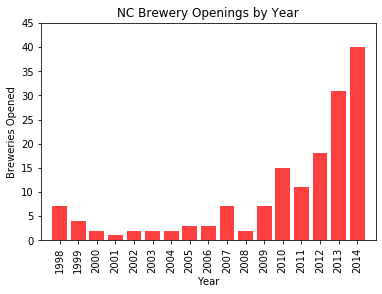

In [17]:

x_axis=yearsDF.index.tolist()

y_axis=yearsDF['Count'].tolist()

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("NC Brewery Openings by Year")
plt.xlabel("Year")
plt.ylabel("Breweries Opened")

plt.xlim(1997, 2015)
plt.ylim(0, max(yearsDF['Count']) + 5)

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, yearsDF.index, rotation=90)
plt.show()

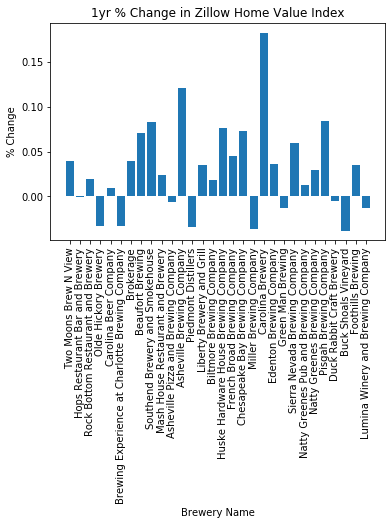

In [18]:
def plotthis(args):
    if len(args) != 3:
        print("You forgot something!")
    metric = args[0]
    ylabel = args[1]
    title = args[2]
    vals = random.sample(list(BrewOutputDF[metric]),30)
    xaxis = np.arange(0,len(vals))
    labels = BrewOutputDF["Brewery"].to_list()
    plt.bar(xaxis,vals)
    tick_locations = [value for value in xaxis]
    plt.xticks(tick_locations, labels, rotation = 'vertical')
    plt.xlabel("Brewery Name")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.rcParams['figure.figsize'] = (20,7)
    return plt.show()
plotthis(['zhviAll1',"% Change","1yr % Change in Zillow Home Value Index"])

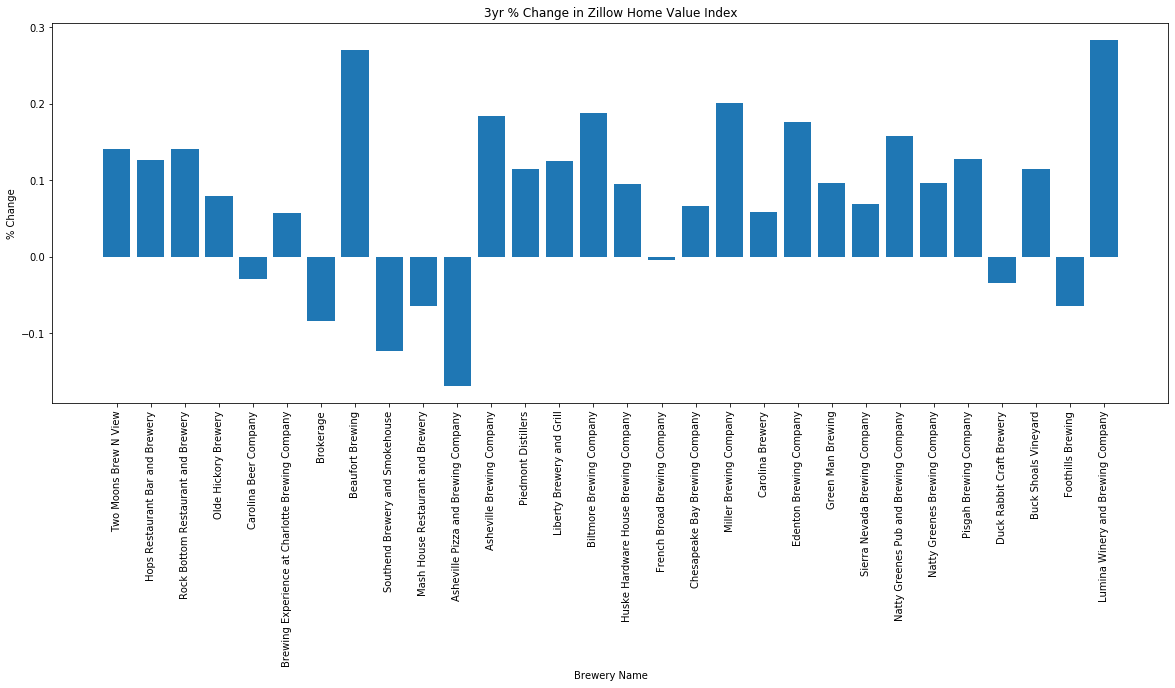

In [19]:
# run in cell below the above code
#Bar chart for 3 year % change by brewery
plotthis(['zhviAll3',"% Change","3yr % Change in Zillow Home Value Index"])

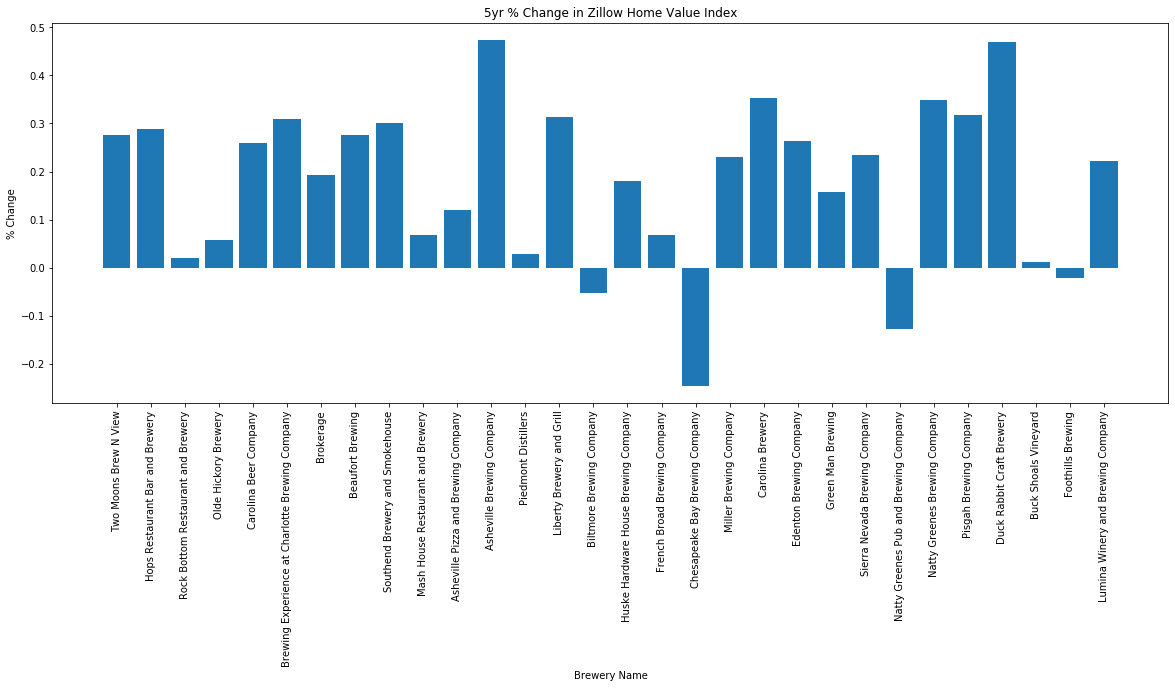

In [20]:
# run in cell below the above code
#Bar chart for 5 year % change by brewery
plotthis(['zhviAll5',"% Change","5yr % Change in Zillow Home Value Index"])

In [21]:
BrewOutput["dy1"] = (BrewOutput["zhviAll1"]*100) - (BrewOutput["zhviNC1"]*100)
BrewOutput["dy3"] = BrewOutput["zhviAll3"]*100 - BrewOutput["zhviNC3"]*100
BrewOutput["dy5"] = BrewOutput["zhviAll5"]*100 - BrewOutput["zhviNC5"]*100

Max1 = BrewOutput["dy1"].describe()["max"]
Mean1 = BrewOutput["dy1"].describe()["mean"]
Min1 = BrewOutput["dy1"].describe()["min"]
Max3 = BrewOutput["dy3"].describe()["max"]
Min3 = BrewOutput["dy3"].describe()["min"]
Max5 = BrewOutput["dy5"].describe()["max"]
Min5 = BrewOutput["dy5"].describe()["min"]

Mean1

1.1817891443250308

C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


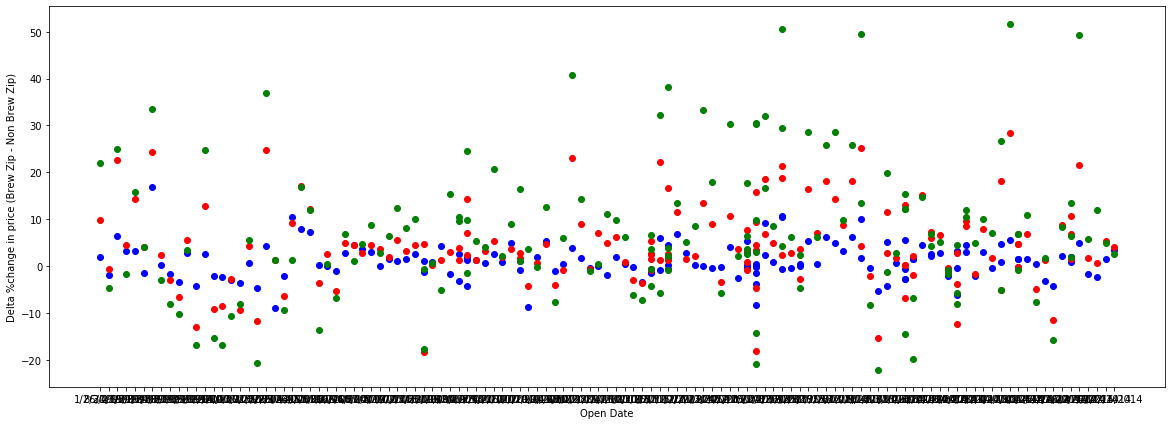

In [22]:
plt.plot_date(x=BrewOutput["Open Date"].to_list(),y=BrewOutput["dy1"].to_list(), color  = "blue")
plt.plot_date(x=BrewOutput["Open Date"].to_list(),y=BrewOutput["dy3"].to_list(), color  = "red")
plt.plot_date(x=BrewOutput["Open Date"].to_list(),y=BrewOutput["dy5"].to_list(), color  = "green")
plt.xlabel("Open Date")
plt.ylabel("Delta %change in price (Brew Zip - Non Brew Zip)")
plt.show()

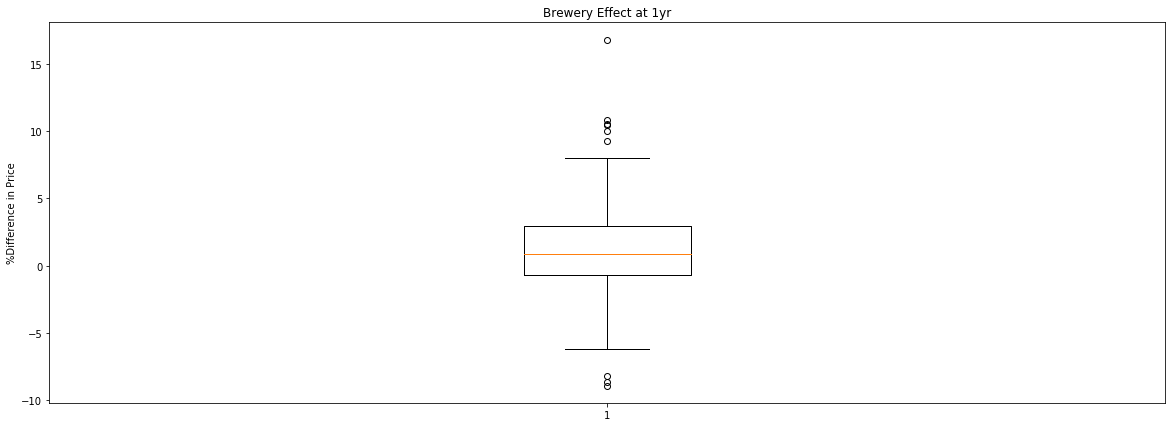

In [23]:
fig1, ax1 = plt.subplots()
#ax1.annotate(np.mean(times), xy=(1, np.mean(times)), xytext=(1.125, np.mean(times)+5))
ax1.set_title('Brewery Effect at 1yr')
ax1.set_ylabel('%Difference in Price')
ax1.boxplot(BrewOutput["dy1"].to_list())
plt.show()

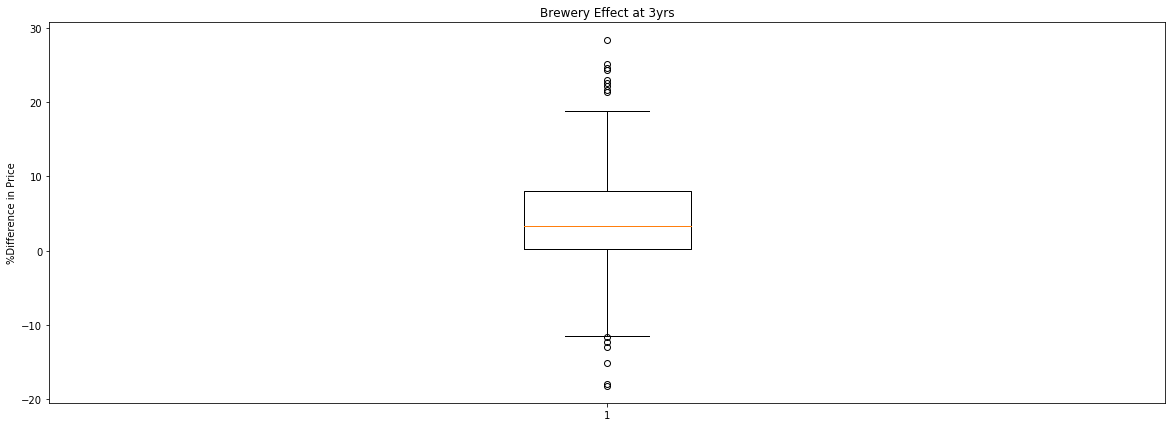

In [24]:
fig1, ax1 = plt.subplots()
#ax1.annotate(np.mean(times), xy=(1, np.mean(times)), xytext=(1.125, np.mean(times)+5))
ax1.set_title('Brewery Effect at 3yrs')
ax1.set_ylabel('%Difference in Price')
ax1.boxplot(BrewOutput["dy3"].to_list())
plt.show()

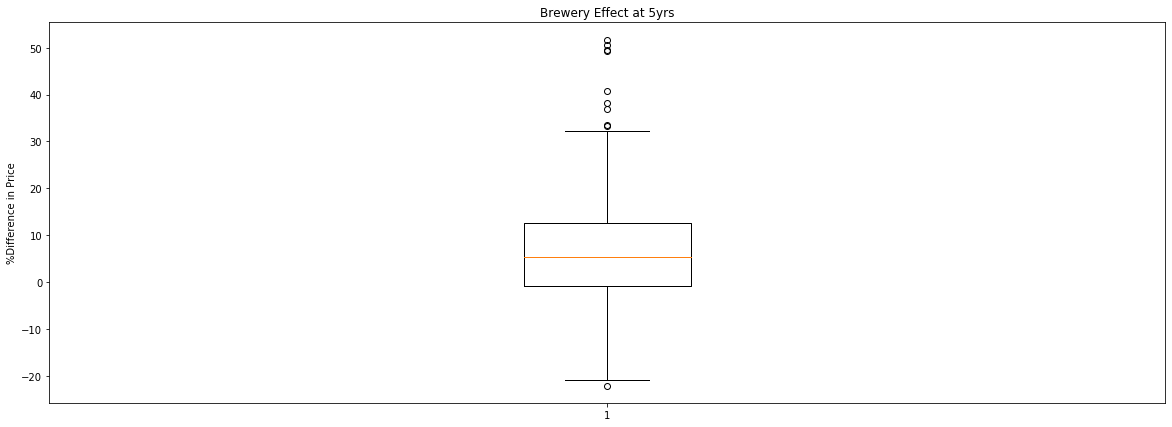

In [25]:
fig1, ax1 = plt.subplots()
#ax1.annotate(np.mean(times), xy=(1, np.mean(times)), xytext=(1.125, np.mean(times)+5))
ax1.set_title('Brewery Effect at 5yrs')
ax1.set_ylabel('%Difference in Price')
ax1.boxplot(BrewOutput["dy5"].to_list())
plt.show()

In [26]:
#geocode search one

target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(28210, gkey2)
response = requests.get(target_url).json()

pprint(response)
response['results'][0]['geometry']['location']['lng']

{'results': [{'address_components': [{'long_name': '28210',
                                      'short_name': '28210',
                                      'types': ['postal_code']},
                                     {'long_name': 'Charlotte',
                                      'short_name': 'Charlotte',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Mecklenburg County',
                                      'short_name': 'Mecklenburg County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'North Carolina',
                                      'short_name': 'NC',
                                      'types': ['administrative_area_level_1',
                                                'political']},
                                     {'long_name': '

-80.8599193

In [27]:
zipcount = pd.DataFrame(BrewOutput['Zip'].value_counts())
zipcount.reset_index(inplace=True)
zipcount.rename(columns={"index": "Zip", "Zip": "Count"},inplace = True)
zipcount

,Zip,Count
0,28801,12
1,27701,5
2,28203,4
3,27101,4
4,27617,3
...,...,...
93,28315,1
94,28016,1
95,28580,1
96,28584,1


In [28]:
#loop through brewoutput df and get lat/lng of zip code center to plot on heatmap
code = []
lat = []
long = []
loop=0

for zipcode in zipcount["Zip"].to_list():
    loop+=1
    target = zipcode
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target, gkey2)
    try:
        response = requests.get(target_url).json()
        lat.append(response['results'][0]['geometry']['location']['lat'])
        long.append(response['results'][0]['geometry']['location']['lng'])
        code.append(zipcode)
    except:
        print(f"Something went wrong with zip: {zipcode}")
    print(f'searching for {zipcode}...{loop}/{len(zipcount["Zip"].to_list())}',end='\r')

In [29]:
brewlocs = pd.DataFrame({"Lats":lat, "Longs":long, "Zip":code})
brewlocs

,Lats,Longs,Zip
0,35.592746,-82.556456,28801
1,35.998120,-78.892044,27701
2,35.214659,-80.859919,28203
3,36.105232,-80.204244,27101
4,35.901742,-78.753288,27617
...,...,...,...
93,35.114614,-79.436632,28315
94,35.316156,-81.273907,28016
95,35.434292,-77.676518,28580
96,34.798471,-76.987348,28584


In [30]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey2)

In [31]:
# Store 'Lat' and 'Lng' into  locations 
locations = brewlocs[["Lats", "Longs"]].astype(float)
locations

,Lats,Longs
0,35.592746,-82.556456
1,35.998120,-78.892044
2,35.214659,-80.859919
3,36.105232,-80.204244
4,35.901742,-78.753288
...,...,...
93,35.114614,-79.436632
94,35.316156,-81.273907
95,35.434292,-77.676518
96,34.798471,-76.987348


In [32]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=zipcount["Count"].to_list(), 
                                 dissipating=False, max_intensity=25,
                                 point_radius = 0.5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
newDF = sorted_df["OpenYear"].value_counts().to_frame()
newDF.rename(columns= {'OpenYear': 'no. opened'}, inplace=True)
newDF.reset_index(inplace = True)
newDF.rename(columns = {"index":"Year"}, inplace = True)
newDF = newDF.sort_values('Year', ascending = False)
newDF

,Year,no. opened
15,2020,2
2,2019,49
0,2018,87
1,2017,49
3,2016,33
5,2015,17
4,2014,25
6,2013,16
7,2012,9
8,2011,5


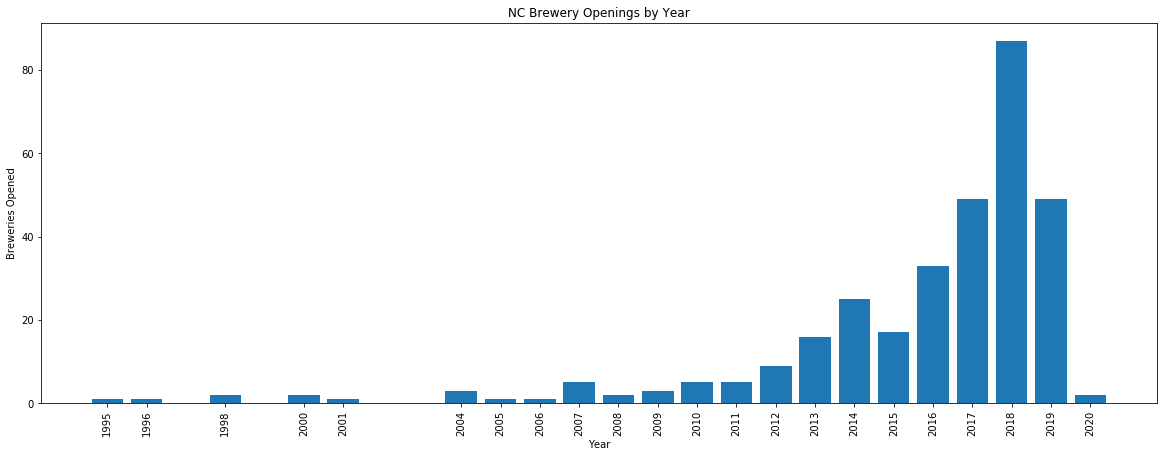

In [34]:
plt.bar(newDF["Year"].to_list(),newDF["no. opened"].to_list())
tick_locations = [x for x in newDF['Year'].to_list()]
plt.xlabel("Year")
plt.ylabel("Breweries Opened")
plt.title("NC Brewery Openings by Year")
plt.xticks(tick_locations,newDF["Year"].to_list(), rotation=90)
plt.show()

In [35]:
#add Delta Rows to BrewOutput
BrewOutput["dy1"] = (BrewOutput["zhviAll1"]*100) - (BrewOutput["zhviNC1"]*100)
BrewOutput["dy3"] = BrewOutput["zhviAll3"]*100 - BrewOutput["zhviNC3"]*100
BrewOutput["dy5"] = BrewOutput["zhviAll5"]*100 - BrewOutput["zhviNC5"]*100
BrewOutput.head()

,Brewery,Open Date,Year,Month,Day,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5,dy1,dy3,dy5
0,Two Moons Brew N View,1/26/1998,1998,1,26,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380,2.070590,9.953938,21.996103
1,Hops Restaurant Bar and Brewery,8/20/1998,1998,8,20,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536,-1.798550,-0.568455,-4.542656
2,Rock Bottom Restaurant and Brewery,3/23/1998,1998,3,23,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794,6.412309,22.577610,25.046430
3,Olde Hickory Brewery,4/15/1998,1998,4,15,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791,3.200712,4.582593,-1.692144
5,Brewing Experience at Charlotte Brewing Company,8/27/1998,1998,8,27,28203,0.077949,0.045145,0.246267,0.102411,0.331767,0.172536,3.280460,14.385568,15.923083


66.2420382165605
33.7579617834395


([<matplotlib.patches.Wedge at 0x225b5970408>,
 [Text(-0.5372431407596809, 0.9598801006931407, 'Gainers'),
  Text(0.537242961018749, -0.9598802012937901, 'Losers')],
 [Text(-0.2930417131416441, 0.5235709640144403, '66.2%'),
  Text(0.2930416151011358, -0.5235710188875218, '33.8%')])

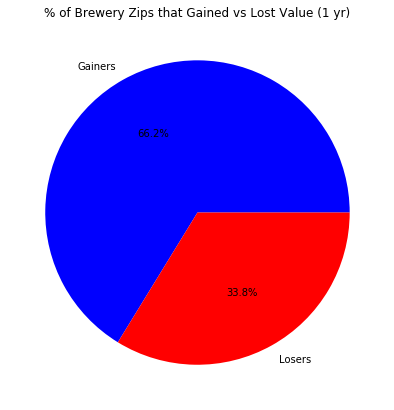

In [36]:
colors = ["blue", "red"]
labels = ("Gainers", "Losers")
gainers = np.sum(BrewOutputDF["zhviAll1"] >= 0)
losers = np.sum(BrewOutputDF["zhviAll1"] < 0 )
total = gainers + losers
gainpct_1yr = (gainers/total)*100
losspct_1yr  = 100 - gainpct_1yr
values_1yr = [gainpct_1yr, losspct_1yr]
print(gainpct_1yr)
print(losspct_1yr)
plt.title("% of Brewery Zips that Gained vs Lost Value (1 yr)")
plt.pie(values_1yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b666d108>,
 [Text(-0.70048791631115, 0.8481253911433518, 'Gainers'),
  Text(0.7004880751255975, -0.8481252599745132, 'Losers')],
 [Text(-0.3820843179879, 0.46261384971455544, '72.0%'),
  Text(0.38208440461396226, -0.46261377816791616, '28.0%')])

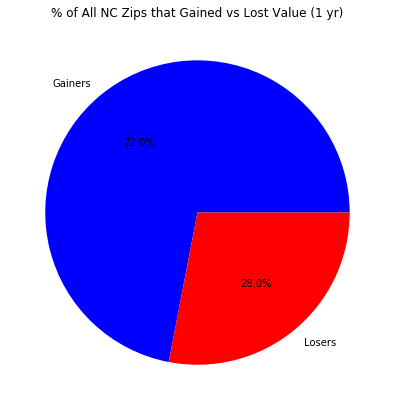

In [37]:
# (New Cell) -- All zips gain v loss 1 year
gainers = np.sum(BrewOutputDF["zhviNC1"] >= 0)
losers = np.sum(BrewOutputDF["zhviNC1"] < 0 )
total = gainers + losers
gainpct_1yr = (gainers/total)*100
losspct_1yr  = 100 - gainpct_1yr
values_1yr = [gainpct_1yr, losspct_1yr]
#print(gainpct_1yr)
#print(losspct_1yr)
plt.title("% of All NC Zips that Gained vs Lost Value (1 yr)")
plt.pie(values_1yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b6629c08>,
 [Text(-0.7816987251812583, 0.7739167287570388, 'Gainers'),
  Text(0.7816986889516006, -0.7739167653509963, 'Losers')],
 [Text(-0.4263811228261409, 0.4221363975038393, '75.2%'),
  Text(0.4263811030645093, -0.42213641746417974, '24.8%')])

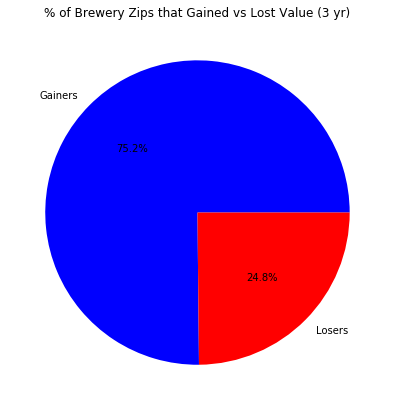

In [38]:
#(New Cell) -- Brewer Zips gain v loss 3 years
gainers = np.sum(BrewOutputDF["zhviAll3"] >= 0)
losers = np.sum(BrewOutputDF["zhviAll3"] < 0 )
total = gainers + losers
gainpct_3yr = (gainers/total)*100
losspct_3yr  = 100 - gainpct_3yr
values_3yr = [gainpct_3yr, losspct_3yr]
plt.title("% of Brewery Zips that Gained vs Lost Value (3 yr)")
plt.pie(values_3yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b6365108>,
 [Text(-0.841074842599387, 0.7089380150241743, 'Gainers'),
  Text(0.8410749421627296, -0.7089378969035026, 'Losers')],
 [Text(-0.458768095963302, 0.3866934627404587, '77.7%'),
  Text(0.4587681502705797, -0.38669339831100136, '22.3%')])

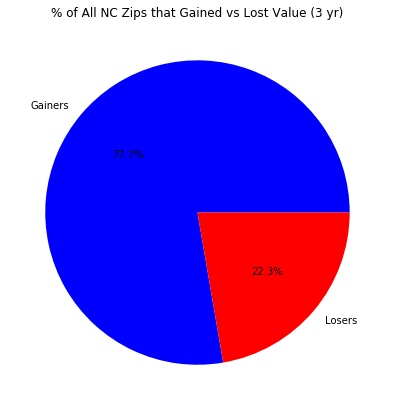

In [39]:
#(new cell) -- All NC Zips gain v loss 3 years
gainers = np.sum(BrewOutputDF["zhviNC3"] >= 0)
losers = np.sum(BrewOutputDF["zhviNC3"] < 0 )
total = gainers + losers
gainpct_3yr = (gainers/total)*100
losspct_3yr  = 100 - gainpct_3yr
values_3yr = [gainpct_3yr, losspct_3yr]
plt.title("% of All NC Zips that Gained vs Lost Value (3 yr)")
plt.pie(values_3yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b61e7548>,
 [Text(-0.9855437547039706, 0.48857292962668325, 'Gainers'),
  Text(0.98554373183222, -0.4885729757633157, 'Losers')],
 [Text(-0.5375693207476202, 0.2664943252509181, '85.4%'),
  Text(0.5375693082721199, -0.266494350416354, '14.6%')])

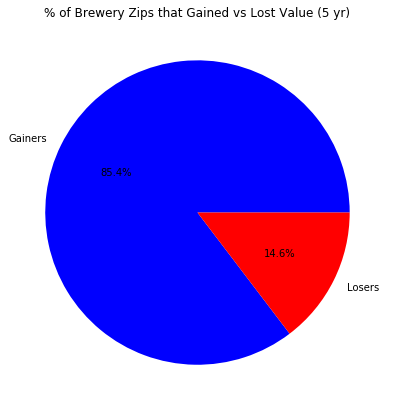

In [40]:
#(new cell) -- Brewery Zips gain v loss 5 years
gainers = np.sum(BrewOutputDF["zhviAll5"] >= 0)
losers = np.sum(BrewOutputDF["zhviAll5"] < 0 )
total = gainers + losers
gainpct_5yr = (gainers/total)*100
losspct_5yr  = 100 - gainpct_5yr
values_5yr = [gainpct_5yr, losspct_5yr]
plt.title("% of Brewery Zips that Gained vs Lost Value (5 yr)")
plt.pie(values_5yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b6320b88>,
 [Text(-0.8820920349548641, 0.6572013708667892, 'Gainers'),
  Text(0.882092034954864, -0.6572013708667893, 'Losers')],
 [Text(-0.48114110997538034, 0.3584734750182486, '79.6%'),
  Text(0.4811411099753803, -0.3584734750182487, '20.4%')])

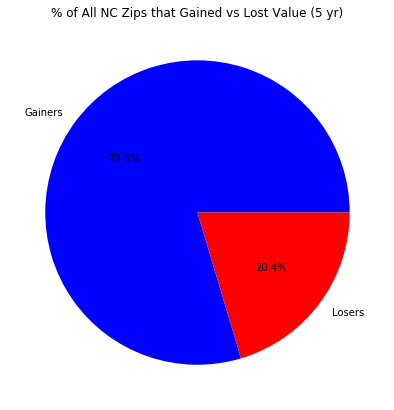

In [41]:
#(new cell) -- All NC Zips gain v loss 5 years
gainers = np.sum(BrewOutputDF["zhviNC5"] >= 0)
losers = np.sum(BrewOutputDF["zhviNC5"] < 0 )
total = gainers + losers
gainpct_5yr = (gainers/total)*100
losspct_5yr  = 100 - gainpct_5yr
values_5yr = [gainpct_5yr, losspct_5yr]
plt.title("% of All NC Zips that Gained vs Lost Value (5 yr)")
plt.pie(values_5yr, colors=colors, autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x225b620c648>,
 [Text(-0.43867993423535656, 1.0087417485656394, 'Positive'),
  Text(0.438679839790136, -1.0087417896378146, 'Negative')],
 [Text(-0.23927996412837627, 0.5502227719448941, '63.1%'),
  Text(0.2392799126128014, -0.5502227943478988, '36.9%')])

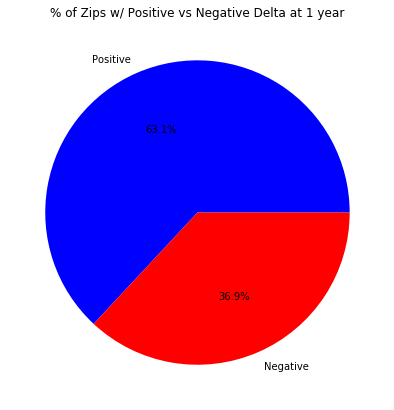

In [42]:
#(new cell) -- positive v negative delta 1 year
delta_labels = ["Positive", "Negative"]
gainers = np.sum(BrewOutput["dy1"] >= 0)
losers = np.sum(BrewOutput["dy1"] < 0 )
total = gainers + losers
deltagain_1yr = (gainers/total)*100
deltaloss_1yr  = 100 - deltagain_1yr
deltavals_1yr = [deltagain_1yr, deltaloss_1yr]
plt.title("% of Zips w/ Positive vs Negative Delta at 1 year")
plt.pie(deltavals_1yr, colors=colors, autopct="%1.1f%%", labels=delta_labels)

([<matplotlib.patches.Wedge at 0x225b6250d88>,
 [Text(-0.7970274906908332, 0.7581208209006489, 'Positive'),
  Text(0.7970275261810291, -0.7581207835890987, 'Negative')],
 [Text(-0.4347422676495453, 0.4135204477639903, '75.8%'),
  Text(0.43474228700783407, -0.4135204274122356, '24.2%')])

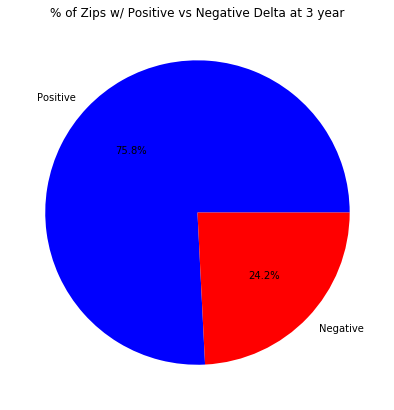

In [43]:
#(new cell) -- positive v negative delta 3 year
gainers = np.sum(BrewOutput["dy3"] >= 0)
losers = np.sum(BrewOutput["dy3"] < 0 )
total = gainers + losers
deltagain_3yr = (gainers/total)*100
deltaloss_3yr  = 100 - deltagain_3yr
deltavals_3yr = [deltagain_3yr, deltaloss_3yr]
plt.title("% of Zips w/ Positive vs Negative Delta at 3 year")
plt.pie(deltavals_3yr, colors=colors, autopct="%1.1f%%", labels=delta_labels)

([<matplotlib.patches.Wedge at 0x225b64d6548>,
 [Text(-0.6833775810193703, 0.8619716246838489, 'Positive'),
  Text(0.6833775810193706, -0.8619716246838487, 'Negative')],
 [Text(-0.37275140782874744, 0.4701663407366448, '71.3%'),
  Text(0.37275140782874755, -0.4701663407366447, '28.7%')])

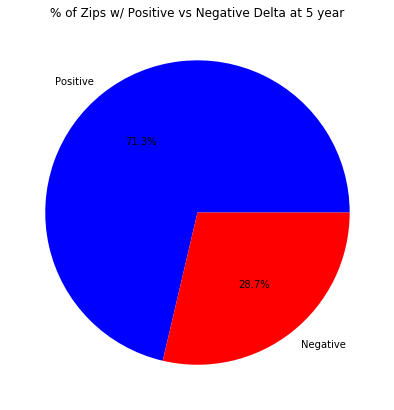

In [44]:
#(new cell) -- positive v negative delta 5 year
gainers = np.sum(BrewOutput["dy5"] >= 0)
losers = np.sum(BrewOutput["dy5"] < 0 )
total = gainers + losers
deltagain_5yr = (gainers/total)*100
deltaloss_5yr  = 100 - deltagain_5yr
deltavals_5yr = [deltagain_5yr, deltaloss_5yr]
plt.title("% of Zips w/ Positive vs Negative Delta at 5 year")
plt.pie(deltavals_5yr, colors=colors, autopct="%1.1f%%", labels=delta_labels)

In [45]:
BreweryDataCleanedv2DF=pd.read_csv('BreweryDataCleanedv2.csv')
BreweryDataCleanedv2DF

,Unnamed: 0,index,Trade Name,Zip,OpenYear,OpenMonth
0,0,55,Catawba Valley Brewing Company,28655,2007,8
1,1,62,Catawba Valley Brewing Company,28801,2016,11
2,2,65,Catawba Valley Brewing Company,28204,2017,10
3,3,70,Rock Bottom Restaurant and Brewery,28202,1998,3
4,4,72,Olde Hickory Brewery,28602,1998,4
...,...,...,...,...,...,...
314,314,1599,Southern Strain Beer Company,28025,2020,1
315,315,1603,New River Brewing,28694,2019,11
316,316,1621,Highland Brewing Company,28803,2007,1
317,317,1629,Carolina Brewing Company,27540,1995,6


In [46]:
#Set Zip as index
BreweryZipSort=BreweryDataCleanedv2DF.set_index('Zip')
BreweryZipSort.sort_index()

,Unnamed: 0,index,Trade Name,OpenYear,OpenMonth
Zip,,,,,
27012,253,1396,Moon Brew,2018,11
27023,177,1109,Westbend Winery and Brewery,2017,10
27030,215,1273,Thirsty Souls Community Brewing,2018,1
27030,247,1375,White Elephant Beer Company,2018,10
27030,29,256,Round Peak Vineyards,2012,10
...,...,...,...,...,...
28901,20,207,Andrews Brewing Company Calaboose Cellars,2013,5
28904,288,1520,Nocturnal Brewing Company,2019,1
28904,201,1213,Hayesville Brewing Company,2019,1


In [47]:
Zip_groupDF = BreweryDataCleanedv2DF['Zip'].value_counts()
Zip_groupDF.head(25)

28801    15
28205    10
28803     9
28403     6
28401     6
27603     6
28405     5
27101     5
28203     5
28792     5
28217     5
28806     5
27804     4
27701     4
28607     4
28206     4
27401     4
28901     4
27608     4
28115     4
28704     4
27526     3
27713     3
28904     3
28711     3
Name: Zip, dtype: int64

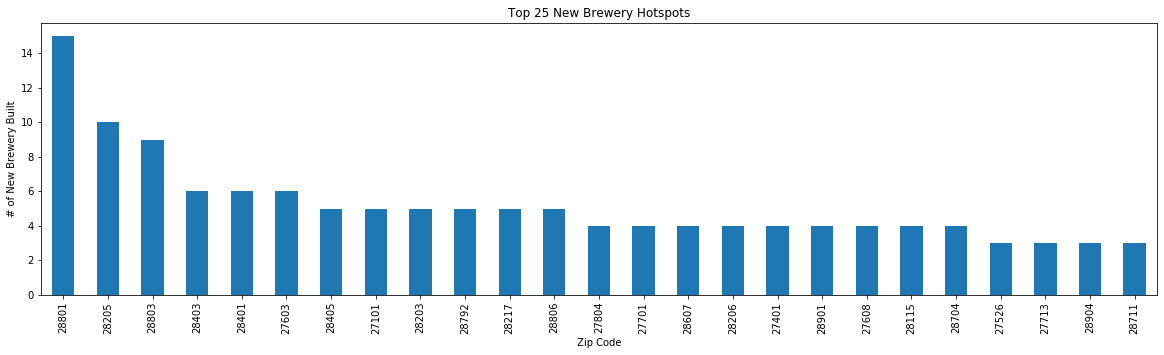

<Figure size 1440x504 with 0 Axes>

In [48]:
# Use DataFrame.plot() in order to create a bar chart of the data
Zip_groupDF.head(25).plot(kind="bar", figsize=(20,5))
# Set a title for the chart
plt.title("Top 25 New Brewery Hotspots")
plt.xlabel("Zip Code")
plt.ylabel("# of New Brewery Built")
plt.show()
plt.tight_layout()

In [49]:
#Find out top Zip Codes Cities
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
zipcode = search.by_zipcode("28801")
zipcode.values()
zipcode_dict=zipcode.to_dict()
#zipcode_city=zipcode['major_city']
city=zipcode_dict['major_city']
city

'Asheville'

In [50]:
BrewOutput["dy1"] = (BrewOutput["zhviAll1"]*100) - (BrewOutput["zhviNC1"]*100)
BrewOutput["dy3"] = BrewOutput["zhviAll3"]*100 - BrewOutput["zhviNC3"]*100
BrewOutput["dy5"] = BrewOutput["zhviAll5"]*100 - BrewOutput["zhviNC5"]*100
#stats (the var at the end can be replaced)
Mean1B = BrewOutput["zhviAll1"].describe()["50%"]
Mean1NB = BrewOutput["zhviNC1"].describe()["50%"]
Mean3B = BrewOutput["zhviAll3"].describe()["50%"]
Mean3NB  = BrewOutput["zhviNC3"].describe()["50%"]
Mean5B = BrewOutput["zhviAll5"].describe()["50%"]
Mean5NB = BrewOutput["zhviNC5"].describe()["50%"]
print(Mean1B*100)
print(Mean1NB*100)
print(Mean3B*100)
print(Mean3NB*100)
print(Mean5B*100)
print(Mean5NB*100)
BrewOutput.head()

2.1640448987505057
2.3076348962449034
10.717660243028849
8.60734645664647
19.353172403366425
17.758642399151036


,Brewery,Open Date,Year,Month,Day,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5,dy1,dy3,dy5
0,Two Moons Brew N View,1/26/1998,1998,1,26,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380,2.070590,9.953938,21.996103
1,Hops Restaurant Bar and Brewery,8/20/1998,1998,8,20,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536,-1.798550,-0.568455,-4.542656
2,Rock Bottom Restaurant and Brewery,3/23/1998,1998,3,23,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794,6.412309,22.577610,25.046430
3,Olde Hickory Brewery,4/15/1998,1998,4,15,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791,3.200712,4.582593,-1.692144
5,Brewing Experience at Charlotte Brewing Company,8/27/1998,1998,8,27,28203,0.077949,0.045145,0.246267,0.102411,0.331767,0.172536,3.280460,14.385568,15.923083


In [51]:
#more stats here
Max1B = BrewOutput["zhviAll1"].describe()["max"]
Max1NB = BrewOutput["zhviNC1"].describe()["max"]
Max3B = BrewOutput["zhviAll3"].describe()["max"]
Max3NB  = BrewOutput["zhviNC3"].describe()["max"]
Max5B = BrewOutput["zhviAll5"].describe()["max"]
Max5NB = BrewOutput["zhviNC5"].describe()["max"]

In [52]:
BrewOutput.reset_index(inplace = True)

In [57]:
#this adds up the breweries by zip
zipcount = pd.DataFrame(BrewOutput['Zip'].value_counts())
zipcount.reset_index(inplace=True)
zipcount.rename(columns={"index": "Zip", "Zip": "Count"},inplace = True)
zipcount

,Zip,Count
0,28801,12
1,27701,5
2,28203,4
3,27101,4
4,27617,3
...,...,...
93,28315,1
94,28016,1
95,28580,1
96,28584,1


In [58]:
#loop through brewoutput df and get lat/lng of zip code center to plot on heatmap
code = []
lat = []
long = []
for zipcode in zipcount["Zip"].to_list():
    target = zipcode
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target, gkey2)
    try:
        response = requests.get(target_url).json()
        lat.append(response['results'][0]['geometry']['location']['lat'])
        long.append(response['results'][0]['geometry']['location']['lng'])
        code.append(zipcode)
    except:
        print(f"Something went wrong with zip: {zipcode}")

In [59]:
brewstats = pd.DataFrame({"Lats":lat, "Longs":long, "Zip": code})
BrewOutput = BrewOutput.merge(brewstats, on = "Zip",  how = 'right')
BrewOutput.dropna(inplace = True)

In [60]:
dy1gains = BrewOutput[(BrewOutput["dy1"] >= 0)]
dy3gains = BrewOutput[(BrewOutput["dy3"] >= 0)]
dy5gains = BrewOutput[(BrewOutput["dy5"] >= 0)]
dy1losses = BrewOutput[(BrewOutput["dy1"] < 0)]
dy3losses = BrewOutput[(BrewOutput["dy3"] < 0)]
dy5losses = BrewOutput[(BrewOutput["dy5"] < 0)]
dy1gainlocs = dy1gains[["Lats", "Longs"]].astype(float)
dy3gainlocs = dy3gains[["Lats", "Longs"]].astype(float)
dy5gainlocs = dy5gains[["Lats", "Longs"]].astype(float)
dy1losslocs = dy1losses[["Lats", "Longs"]].astype(float)
dy3losslocs = dy3losses[["Lats", "Longs"]].astype(float)
dy5losslocs = dy5losses[["Lats", "Longs"]].astype(float)

In [61]:
#make a plotter that accepts inputs of [df["colname"],[coordinatelist],background color, hot color, **intensity, **radius]
def gmapsplotter(args):
    #simple version
    if (len(args) == 4):
        metric = args[0]
        coords = args[1]
        color1 = args[2]
        color2 = args[3]
        intensity = 25
        radius = 0.25
    #pass more parameters
    if (len(args) == 6):
        metric = args[0]
        coords = args[1]
        color1 = args[2]
        color2 = args[3]
        intensity = args[4]
        radius = args[5]
    #use inputs to plot things
    fig = gmaps.figure()
    heat_layer = gmaps.heatmap_layer(coords, weights=metric,
                                 dissipating=False, max_intensity=intensity,
                                 point_radius = radius)
    heat_layer.gradient = [color1,'white',color2]
    fig.add_layer(heat_layer)
    return fig

GMAPS heatmaps showing gainers(blue) and losers(red) for each time period(1yr, 3yr, 5yr)

In [73]:
gmapsplotter([dy1gains["dy1"],dy1gainlocs,"#000000","#0000FF",1,0.1])

Figure(layout=FigureLayout(height='420px'))

In [64]:
gmapsplotter([dy1losses["dy1"]*-1,dy1losslocs,"#000000","#FF0000",1,0.1])

Figure(layout=FigureLayout(height='420px'))

In [65]:
gmapsplotter([dy3gains["dy3"],dy3gainlocs,"#000000","#0000FF",1,0.1])

Figure(layout=FigureLayout(height='420px'))

In [66]:
gmapsplotter([dy3losses["dy3"]*-1,dy3losslocs,"#000000","#FF0000",1,0.1])

Figure(layout=FigureLayout(height='420px'))

In [67]:
gmapsplotter([dy5gains["dy5"],dy5gainlocs,"#000000","#0000FF",1,0.1])

Figure(layout=FigureLayout(height='420px'))

In [68]:
gmapsplotter([dy5losses["dy5"]*-1,dy5losslocs,"#000000","#FF0000",1,0.1])

Figure(layout=FigureLayout(height='420px'))